In [20]:
import numpy as np
import pandas as pd
import rdkit
from rdkit import Chem
import warnings
warnings.filterwarnings('ignore')

In [21]:
features = ["AlogP", "Molecular_Weight", "Num_H_Acceptors", "Num_H_Donors", "Num_RotatableBonds", "LogD", "Molecular_PolarSurfaceArea"]
mlm_target = "MLM"
hlm_target = "HLM"

# load data
df = pd.read_csv("../data/test.csv")
df["AlogP"] = np.where(pd.isna(df["AlogP"]), df["LogD"], df["AlogP"])
df['mol'] = df['SMILES'].apply(lambda x : Chem.MolFromSmiles(x))
df['mol'] = df['mol'].apply(lambda x: Chem.AddHs(x))
df['num_of_atoms'] = df['mol'].apply(lambda x: x.GetNumAtoms())
df['num_of_heavy_atoms'] = df['mol'].apply(lambda x: x.GetNumHeavyAtoms())
def canonize(mol):
    return Chem.MolToSmiles(Chem.MolFromSmiles(mol), isomericSmiles=True, canonical=True)

canon_smile = []
for molecule in df['SMILES']:
    canon_smile.append(canonize(molecule))
    
df['canon_smiles'] = canon_smile
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 483 entries, 0 to 482
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          483 non-null    object 
 1   SMILES                      483 non-null    object 
 2   AlogP                       483 non-null    float64
 3   Molecular_Weight            483 non-null    float64
 4   Num_H_Acceptors             483 non-null    int64  
 5   Num_H_Donors                483 non-null    int64  
 6   Num_RotatableBonds          483 non-null    int64  
 7   LogD                        483 non-null    float64
 8   Molecular_PolarSurfaceArea  483 non-null    float64
 9   mol                         483 non-null    object 
 10  num_of_atoms                483 non-null    int64  
 11  num_of_heavy_atoms          483 non-null    int64  
 12  canon_smiles                483 non-null    object 
dtypes: float64(4), int64(5), object(4)


In [22]:
df.head()

,id,SMILES,AlogP,Molecular_Weight,Num_H_Acceptors,Num_H_Donors,Num_RotatableBonds,LogD,Molecular_PolarSurfaceArea,mol,num_of_atoms,num_of_heavy_atoms,canon_smiles
0,TEST_000,CC(C)Nc1ccnc(N2CCN(Cc3cccs3)C(CCO)C2)n1,2.641,361.505,4,2,7,2.635,92.76,<rdkit.Chem.rdchem.Mol object at 0x00000225EAB...,52,25,CC(C)Nc1ccnc(N2CCN(Cc3cccs3)C(CCO)C2)n1
1,TEST_001,COc1cc(=O)n(-c2ccccc2)cc1C(=O)N1CCC2(CC1)OCCO2,0.585,370.399,5,0,3,0.585,68.31,<rdkit.Chem.rdchem.Mol object at 0x00000225EAB...,49,27,COc1cc(=O)n(-c2ccccc2)cc1C(=O)N1CCC2(CC1)OCCO2
2,TEST_002,Cc1cccc(NC(=N)/N=c2\nc(O)c(Cc3ccccc3)c(C)[nH]2)c1,4.276,347.414,4,4,5,4.290,92.86,<rdkit.Chem.rdchem.Mol object at 0x00000225EAB...,47,26,Cc1cccc(NC(=N)/N=c2\nc(O)c(Cc3ccccc3)c(C)[nH]2)c1
3,TEST_003,O=C(c1nc2ncccn2n1)N1CCCn2cc(-c3ccccc3)nc21,1.795,345.358,5,0,2,1.795,81.21,<rdkit.Chem.rdchem.Mol object at 0x00000225EAB...,41,26,O=C(c1nc2ncccn2n1)N1CCCn2cc(-c3ccccc3)nc21
4,TEST_004,CCN1CCN(C(=O)c2cc3c(=O)n4cc(C)ccc4nc3n2C)CC1,1.219,353.418,4,0,2,0.169,61.15,<rdkit.Chem.rdchem.Mol object at 0x00000225EAB...,49,26,CCN1CCN(C(=O)c2cc3c(=O)n4cc(C)ccc4nc3n2C)CC1


In [23]:
df.index[df['canon_smiles'].duplicated()]

Index([], dtype='int64')

In [4]:
ind = df.index[df['canon_smiles'].duplicated()]
df = df.drop(ind)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 483 entries, 0 to 482
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          483 non-null    object 
 1   SMILES                      483 non-null    object 
 2   AlogP                       483 non-null    float64
 3   Molecular_Weight            483 non-null    float64
 4   Num_H_Acceptors             483 non-null    int64  
 5   Num_H_Donors                483 non-null    int64  
 6   Num_RotatableBonds          483 non-null    int64  
 7   LogD                        483 non-null    float64
 8   Molecular_PolarSurfaceArea  483 non-null    float64
 9   mol                         483 non-null    object 
 10  num_of_atoms                483 non-null    int64  
 11  num_of_heavy_atoms          483 non-null    int64  
 12  canon_smiles                483 non-null    object 
dtypes: float64(4), int64(5), object(4)


In [6]:
feature_df = df[['AlogP', 'Molecular_Weight', 'Num_H_Acceptors', 'Num_H_Donors', 'Num_RotatableBonds', 'LogD', 'Molecular_PolarSurfaceArea', 'num_of_atoms', 'num_of_heavy_atoms']]

<Axes: >

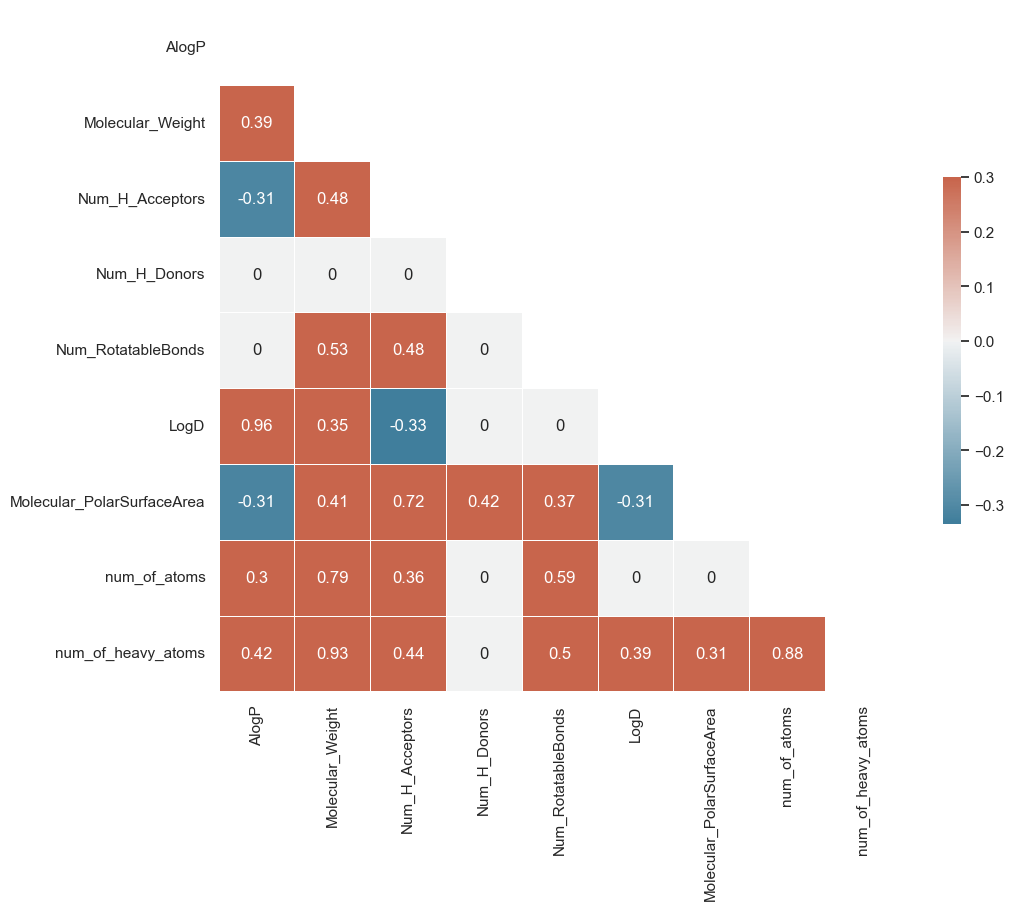

In [7]:
from string import ascii_letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="white")

# Generate a large random dataset
d = pd.DataFrame(data=feature_df,
                 columns=feature_df.columns)

# Compute the correlation matrix
corr = d.corr()

corr[0.3 > abs(corr)] = 0
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

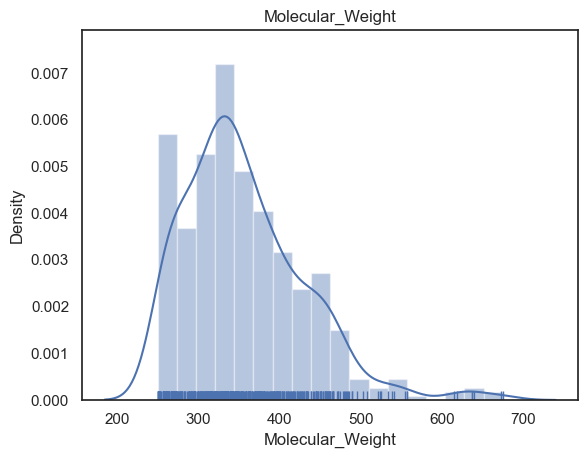

In [9]:
sns.distplot(d['Molecular_Weight'], kde=True, rug=True)
plt.title('Molecular_Weight')
plt.show()

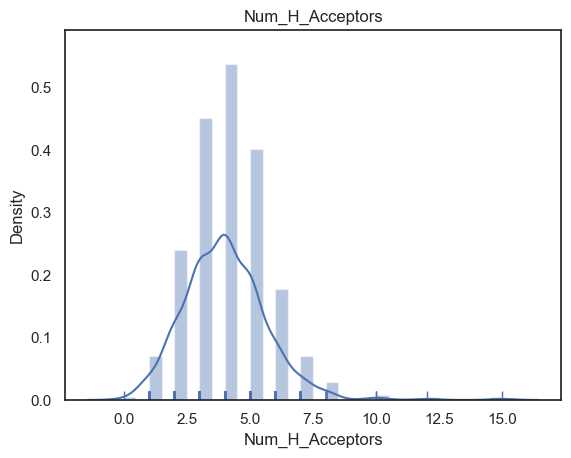

In [10]:
sns.distplot(d['Num_H_Acceptors'], kde=True, rug=True)
plt.title('Num_H_Acceptors')
plt.show()

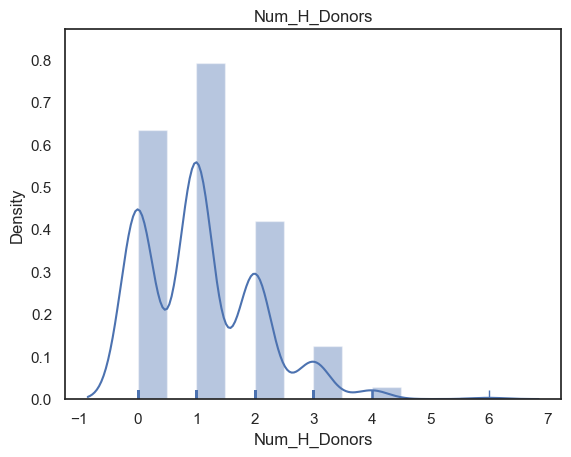

In [11]:
sns.distplot(d['Num_H_Donors'], kde=True, rug=True)
plt.title('Num_H_Donors')
plt.show()

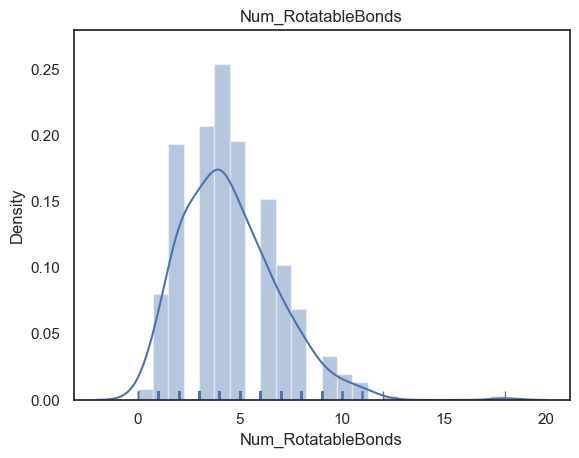

In [12]:
sns.distplot(d['Num_RotatableBonds'], kde=True, rug=True)
plt.title('Num_RotatableBonds')
plt.show()

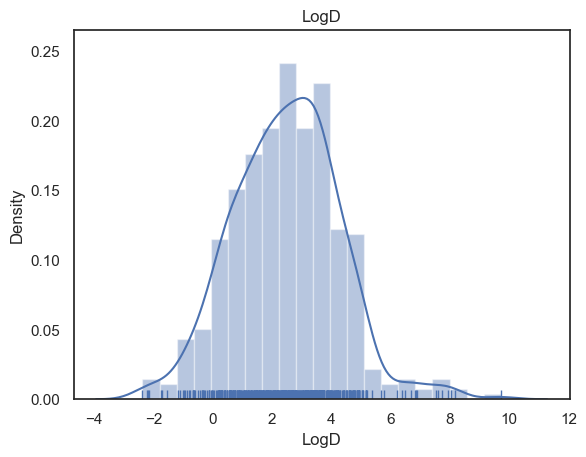

In [13]:
sns.distplot(d['LogD'], kde=True, rug=True)
plt.title('LogD')
plt.show()

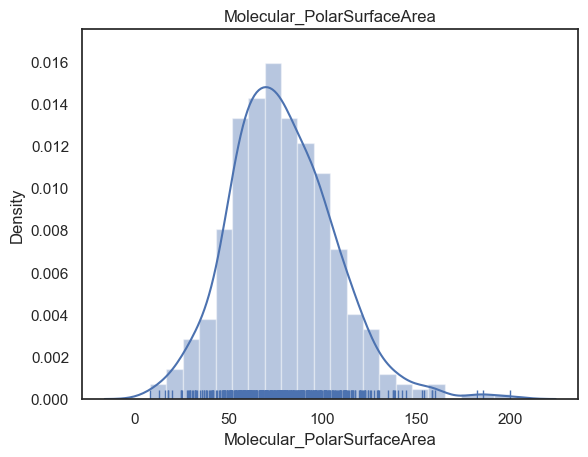

In [14]:
sns.distplot(d['Molecular_PolarSurfaceArea'], kde=True, rug=True)
plt.title('Molecular_PolarSurfaceArea')
plt.show()

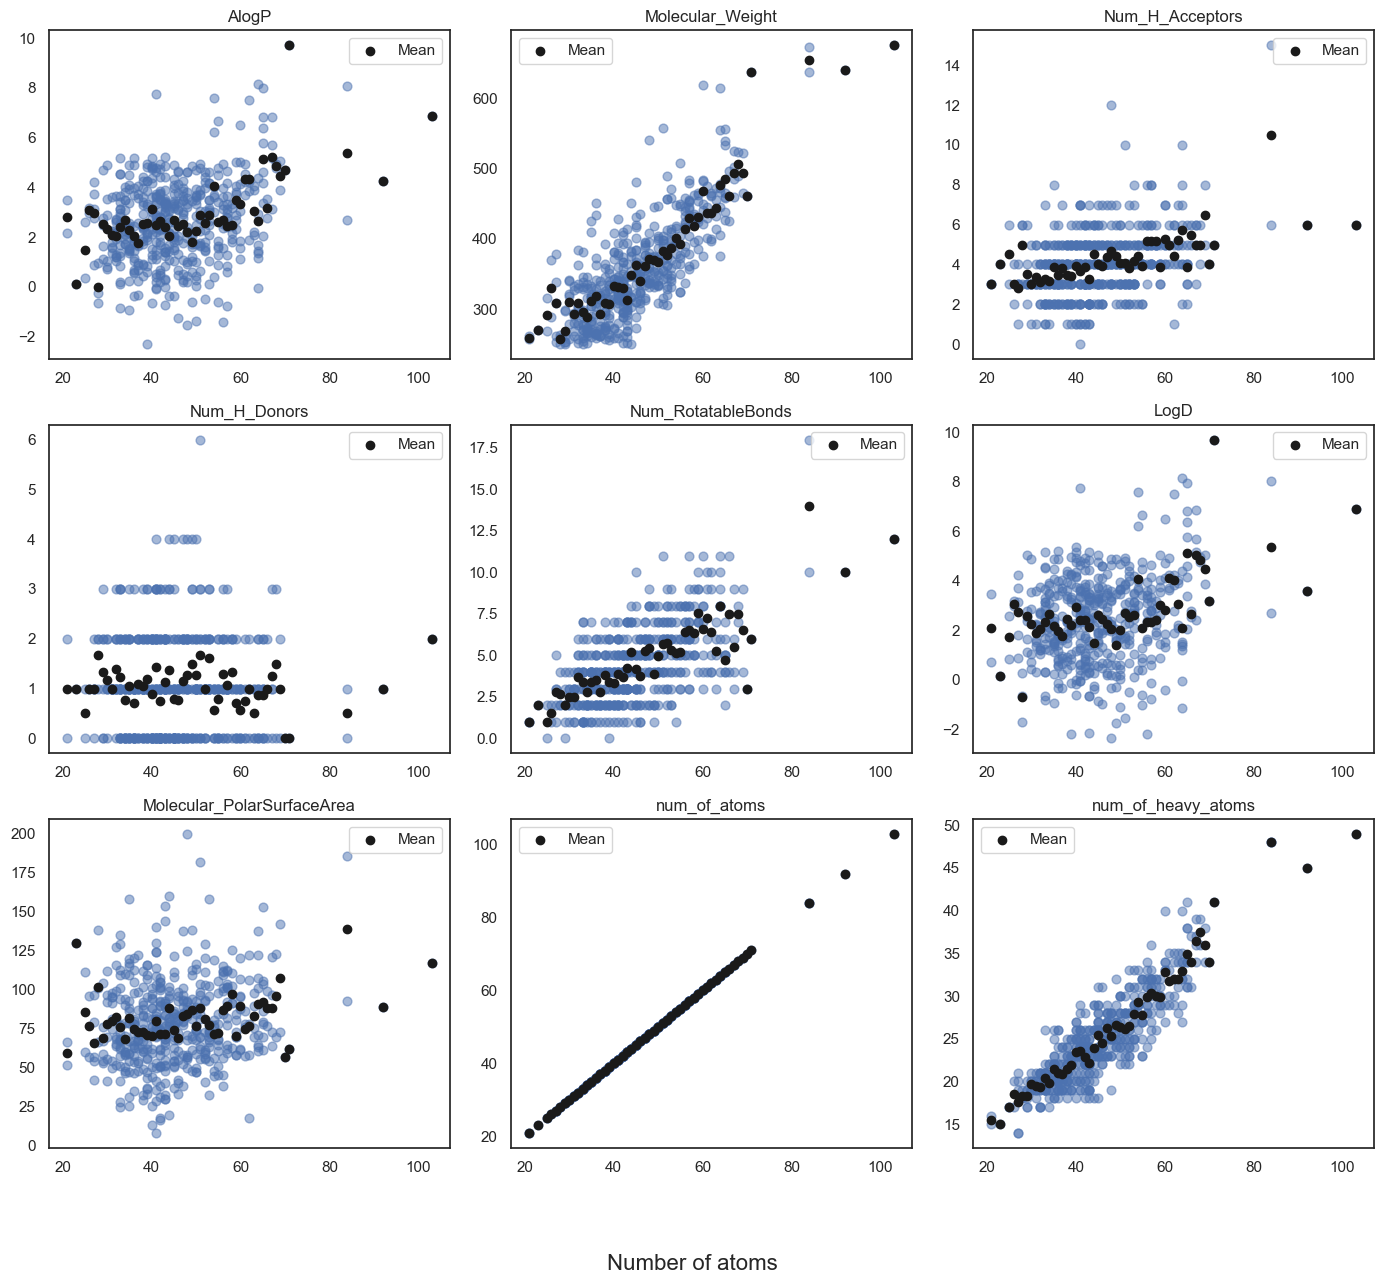

In [15]:
plt.figure(figsize=(14,20))
plot_counter = 1
for prop in d.iloc[:, :].columns:
    plt.subplot(int(np.ceil(len(d.iloc[:, :].columns)/2)), 3, plot_counter)
    plt.scatter(d['num_of_atoms'], d[prop], s=40, alpha=0.5)
    
    for atom in np.unique(d['num_of_atoms']):
        plt.scatter(atom, d[prop][d['num_of_atoms'] == atom].mean(), c='k', label='Mean')
        
    # Dictionaries can't have duplicated keys
    # This prevents repeated legend entries
    handles, labels = plt.gca().get_legend_handles_labels()
    by_label = dict(zip(labels, handles))
    plt.legend(by_label.values(), by_label.keys())
    
    plt.title(prop)
    plot_counter = plot_counter + 1
    
plt.suptitle('Number of atoms', x=.5, y=0.35, ha='center', size=16) 
plt.tight_layout()
plt.show()

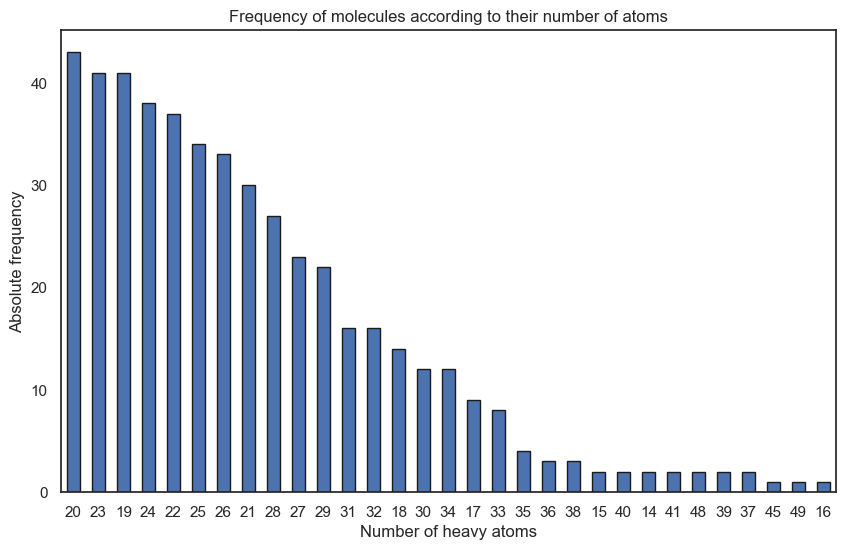

In [16]:
df['num_of_heavy_atoms'].value_counts(sort=True).plot.bar(figsize=(10,6), 
                                                     title="Frequency of molecules according to their number of atoms", 
                                                     xlabel='Number of heavy atoms',
                                                     ylabel='Absolute frequency',
                                                     rot=0,
                                                     edgecolor='k')
plt.show()

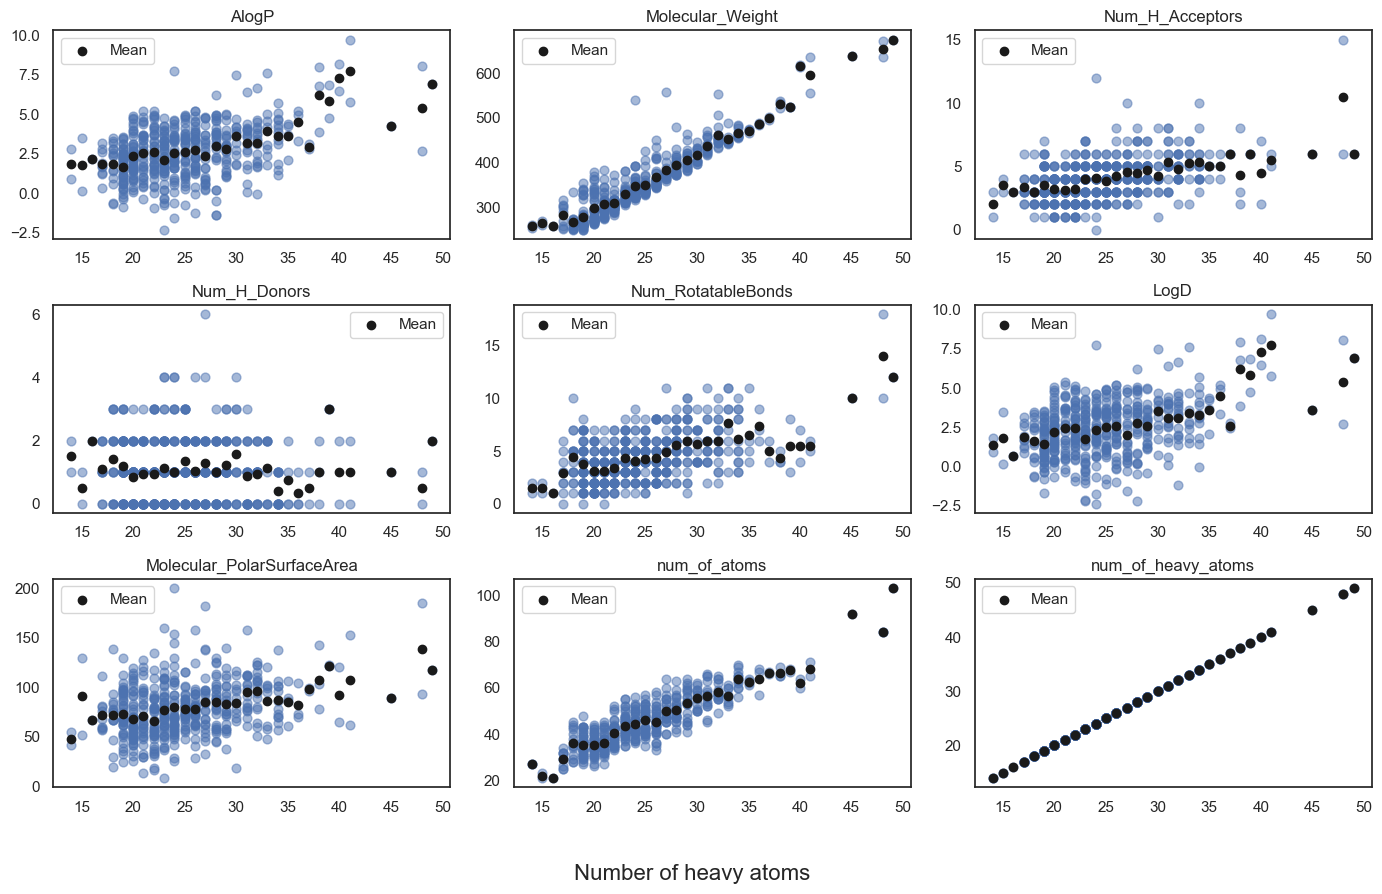

In [17]:
plt.figure(figsize=(14,14))
plot_counter = 1
for prop in d.iloc[:,:].columns:
    plt.subplot(int(np.ceil(len(d.iloc[:,:].columns)/2)), 3, plot_counter)
    plt.scatter(d['num_of_heavy_atoms'], d[prop], s=40, alpha=0.5)
    
    for atom in np.unique(d['num_of_heavy_atoms']):
        plt.scatter(atom, d[prop][d['num_of_heavy_atoms'] == atom].mean(), c='k', label='Mean')
        
    # Dictionaries can't have duplicated keys
    # This prevents repeated legend entries
    handles, labels = plt.gca().get_legend_handles_labels()
    by_label = dict(zip(labels, handles))
    plt.legend(by_label.values(), by_label.keys())
    
    plt.title(prop)
    plot_counter = plot_counter + 1
    
plt.suptitle('Number of heavy atoms', x=.5, y=0.35, ha='center', size=16) 
plt.tight_layout()
plt.show()

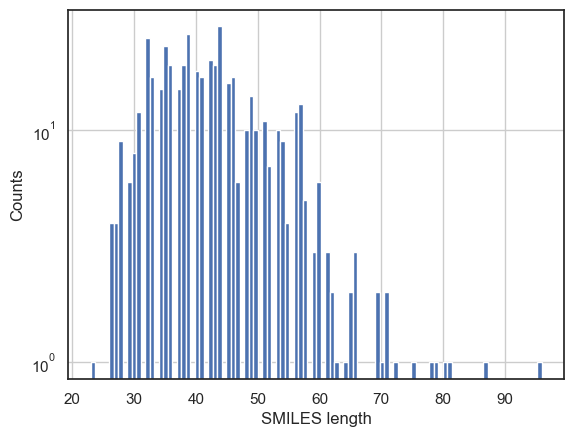

In [18]:
lengths = list(map(len, df['canon_smiles'].values))

plt.hist(lengths, bins=100)
plt.grid()
plt.xlabel('SMILES length')
plt.ylabel('Counts')
plt.yscale('log')